=== PROGRAM KNIGHT'S TOUR (8x8) ===

Solusi ditemukan!

[54, 41, 14, 11, 56, 31, 16, 9]
[13, 0, 55, 42, 15, 10, 33, 30]
[40, 53, 12, 63, 32, 57, 8, 17]
[1, 24, 45, 50, 43, 62, 29, 34]
[46, 39, 52, 25, 58, 35, 18, 7]
[23, 2, 49, 44, 51, 26, 61, 28]
[38, 47, 4, 21, 36, 59, 6, 19]
[3, 22, 37, 48, 5, 20, 27, 60]


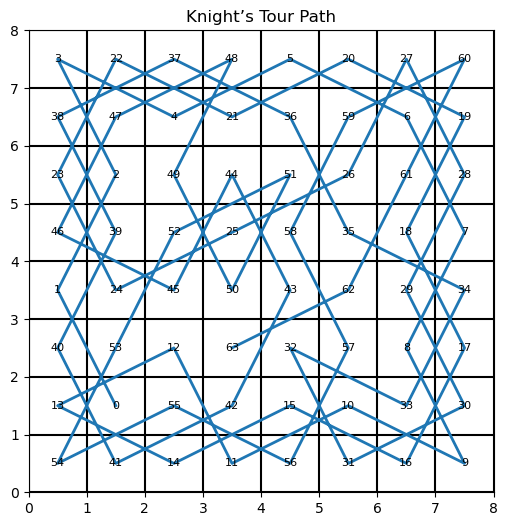

In [11]:
import matplotlib.pyplot as plt

N = 8

move_x = [2, 1, -1, -2, -2, -1, 1, 2]
move_y = [1, 2, 2, 1, -1, -2, -2, -1]


def is_valid(x, y, board):
    return 0 <= x < N and 0 <= y < N and board[y][x] == -1


def count_onward_moves(x, y, board):
    count = 0
    for i in range(8):
        nx = x + move_x[i]
        ny = y + move_y[i]
        if is_valid(nx, ny, board):
            count += 1
    return count


def next_move(x, y, board):
    min_deg = 9
    next_x, next_y = -1, -1

    for i in range(8):
        nx = x + move_x[i]
        ny = y + move_y[i]
        if is_valid(nx, ny, board):
            deg = count_onward_moves(nx, ny, board)
            if deg < min_deg:
                min_deg = deg
                next_x, next_y = nx, ny

    return next_x, next_y


def knight_tour(start_x, start_y, want_closed=False):
    board = [[-1 for _ in range(N)] for _ in range(N)]
    path = []

    x, y = start_x, start_y
    board[y][x] = 0
    path.append((x, y))

    for step in range(1, N * N):
        nx, ny = next_move(x, y, board)
        if nx == -1:
            return None, None  

        board[ny][nx] = step
        path.append((nx, ny))
        x, y = nx, ny

    if want_closed:
        sx, sy = path[0]
        for i in range(8):
            if x + move_x[i] == sx and y + move_y[i] == sy:
                return board, path
        return None, None

    return board, path

def plot_path(path):
    plt.figure(figsize=(6, 6))
    plt.gca().invert_yaxis()

    for i in range(9):
        plt.plot([0, 8], [i, i], color='black')
        plt.plot([i, i], [0, 8], color='black')

    x_vals = [p[0] + 0.5 for p in path]
    y_vals = [p[1] + 0.5 for p in path]
    plt.plot(x_vals, y_vals, linewidth=2)

    for i, (x, y) in enumerate(path):
        plt.text(x + 0.5, y + 0.5, str(i), ha='center', va='center', fontsize=8)

    plt.title("Knight’s Tour Path")
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.show()


print("=== PROGRAM KNIGHT'S TOUR (8x8) ===")
sx = int(input("Masukkan posisi awal X (1-8): "))
sy = int(input("Masukkan posisi awal Y (1-8): "))

if not (1 <= sx <= 8 and 1 <= sy <= 8):
    print("Posisi harus dalam rentang 1–8!")
    exit()

sx -= 1
sy -= 1

mode = input("Pilih mode (open / closed): ").lower()
want_closed = (mode == "closed")

board, path = knight_tour(sx, sy, want_closed)

if board is None:
    print("\nGagal menemukan solusi untuk posisi awal tersebut!")
else:
    print("\nSolusi ditemukan!\n")
    for row in board:
        print(row)

    plot_path(path)
